In [1]:
import sympy as sp
import numpy as np
import control
import tbcontrol.symbolic
import tbcontrol.numeric
import tbcontrol.responses
import mpmath
import jupyterthemes as jt

from matplotlib import pyplot as plt
from scipy import signal
from scipy import optimize

jt.jtplot.style(theme="gruvboxd")
sp.init_printing()
%matplotlib inline

# Linearisation i.t.o deviation variables

## Custom method

In [2]:
sp.var("F_1,F_2,k_3,h,Fbar_1,Fbar_2,hbar,dh,dt,A")
Fpr_1,Fpr_2,hpr,dhpr=sp.symbols("F'_1,F'_2,h',dh'")

Adhdt=F_1+F_2-k_3*sp.sqrt(h)
var=(F_1,Fbar_1),(F_2,Fbar_2),(h,hbar)
Adhprimedt=Adhdt.diff(F_1).subs(var)*Fpr_1+Adhdt.diff(F_2).subs(var)*Fpr_2+Adhdt.diff(h).subs(var)*hpr

display(sp.Eq(A*dh/dt,Adhdt))
display(sp.Eq(A*dhpr/dt,Adhprimedt))

# Transfer functions

## Signal.lti

### 's' coefficient method

In [3]:
sp.var("s")

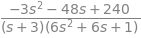

In [4]:
G = (-3*s**2 - 48*s + 240)/((s + 3)*(6*s**2 + 6*s + 1))
G

In [5]:
numer = sp.poly(sp.numer(G), s)
denom = sp.poly(sp.denom(G), s)
numer, denom

In [6]:
G_lti = signal.lti([-3, -48, 240], [6, 24, 19, 3])
G_lti

TransferFunctionContinuous(
array([-0.5, -8. , 40. ]),
array([1.        , 4.        , 3.16666667, 0.5       ]),
dt: None
)

### Extracting zeros, poles, gain

In [7]:
G_lti.zeros

array([-20.,   4.])

In [8]:
G_lti.poles

array([-3.        , -0.78867513, -0.21132487])

In [9]:
# gain
G.subs({s: 0})

### Plotting with step response
if input = 50/s

In [10]:
t_span = np.linspace(0, 40, 1000)
y = 50*G_lti.step(T=t_span)[1]

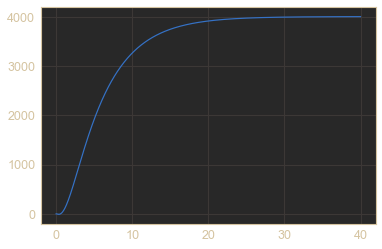

In [11]:
plt.figure()
plt.plot(t_span, y)

### Converting to and from SS

In [12]:
G_lti = signal.lti([-3, -48, 240], [6, 24, 19, 3])
G_lti

TransferFunctionContinuous(
array([-0.5, -8. , 40. ]),
array([1.        , 4.        , 3.16666667, 0.5       ]),
dt: None
)

In [13]:
# Create new ss object from tf object
G_ss = G_lti.to_ss()
A, B, C, D = G_ss.A, G_ss.B, G_ss.C, G_ss.D
A, B, C, D

(array([[-4.        , -3.16666667, -0.5       ],
        [ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  1.        ,  0.        ]]),
 array([[1.],
        [0.],
        [0.]]),
 array([[-0.5, -8. , 40. ]]),
 array([[0.]]))

In [14]:
# Create new tf object from ss object
G_tf = G_ss.to_tf()
num, denom = G_tf.num, G_tf.den
num, denom

C:\Users\Ang\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:1622: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


(array([-0.5, -8. , 40. ]),
 array([1.        , 4.        , 3.16666667, 0.5       ]))

In [15]:
# Straight conversion to ss
G_ss = signal.lti_conversion.tf2ss([-3, -48, 240], [6, 24, 19, 3])
G_ss

(array([[-4.        , -3.16666667, -0.5       ],
        [ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  1.        ,  0.        ]]),
 array([[1.],
        [0.],
        [0.]]),
 array([[-0.5, -8. , 40. ]]),
 array([[0.]]))

In [16]:
# Straight conversion to tf
G_tf = signal.lti_conversion.ss2tf(A, B, C, D)
G_tf

(array([[ 0. , -0.5, -8. , 40. ]]),
 array([1.        , 4.        , 3.16666667, 0.5       ]))

## Control

### 's' coefficient method

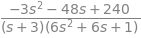

In [17]:
G = (-3*s**2 - 48*s + 240)/((s + 3)*(6*s**2 + 6*s + 1))
G

In [18]:
numer = sp.poly(sp.numer(G), s)
denom = sp.poly(sp.denom(G), s)
numer, denom

In [19]:
G_cntl = control.tf([-3, -48, 240], [6, 24, 19, 3])
G_cntl


   -3 s^2 - 48 s + 240
-------------------------
6 s^3 + 24 s^2 + 19 s + 3

### 's' direct method
signal.lti can't do this

In [20]:
s = control.tf([1, 0], [1])
G_cntl = (-3*s**2 - 48*s + 240)/((s + 3)*(6*s**2 + 6*s + 1))
G_cntl


   -3 s^2 - 48 s + 240
-------------------------
6 s^3 + 24 s^2 + 19 s + 3

### Extracting zeros, poles, gain

In [21]:
G_cntl.zero()

array([-20.,   4.])

In [22]:
G_cntl.pole()

array([-3.        , -0.78867513, -0.21132487])

In [23]:
G_cntl.dcgain()

array(80.)

### Plotting step response

In [24]:
t_span = np.linspace(0, 40, 1000)
y = 50*control.step_response(G_cntl, t_span)[1]

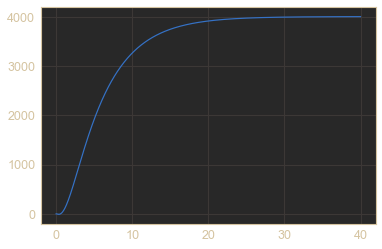

In [25]:
plt.figure()
plt.plot(t_span, y)

### Converting to and from SS

In [26]:
G_ss = control.ss(G_cntl)
G_ss

A = [[-4.00000000e+00  3.16666667e-01  5.00000000e-02]
 [-1.00000000e+01  5.86781609e-16  1.74377246e-15]
 [ 0.00000000e+00  1.00000000e+00  6.90486048e-16]]

B = [[-1.]
 [ 0.]
 [ 0.]]

C = [[ 0.5 -0.8  4. ]]

D = [[0.]]

In [38]:
# Or can create object from matrixes
A, B, C, D = G_ss.A, G_ss.B, G_ss.C, G_ss.D
G_ss = control.ss(A, B, C, D)
G_ss

A = [[-4.00000000e+00  3.16666667e-01  5.00000000e-02]
 [-1.00000000e+01  5.86781609e-16  1.74377246e-15]
 [ 0.00000000e+00  1.00000000e+00  6.90486048e-16]]

B = [[-1.]
 [ 0.]
 [ 0.]]

C = [[ 0.5 -0.8  4. ]]

D = [[0.]]

In [28]:
G_tf = control.tf(G_ss)
G_tf


    -0.5 s^2 - 8 s + 40
---------------------------
s^3 + 4 s^2 + 3.167 s + 0.5

### Transfer function matrices
signal.lti cant perform these operations

In [29]:
# numer/denom method
numer1 = [1, 2]
numer2 = [2]
numer3 = [3]
numer4 = [4]
denom1 = [1, 1]
denom2 = [2, 1]
denom3 = [3, 1]
denom4 = [4, 1]

G_matrix = control.tf([[numer1, numer2],
                       [numer3, numer4]],
                     
                       [[denom1, denom2],
                        [denom3, denom4]])
G_matrix


Input 1 to output 1:
s + 2
-----
s + 1

Input 1 to output 2:
   3
-------
3 s + 1

Input 2 to output 1:
   2
-------
2 s + 1

Input 2 to output 2:
   4
-------
4 s + 1

In [30]:
# direct method
s = control.tf([1, 0], [1])
G1 = (s + 2)/(s + 1)
G2 = (2)/(2*s + 1)
G3 = (3)/(3*s + 1)
G4 = (4)/(4*s + 1)
G_matrix = control.tf([[G1.num[0][0], G2.num[0][0]],
                       [G3.num[0][0], G4.num[0][0]]],
                      [[G1.den[0][0], G2.den[0][0]],
                       [G3.den[0][0], G4.den[0][0]]])
G_matrix


Input 1 to output 1:
s + 2
-----
s + 1

Input 1 to output 2:
   3
-------
3 s + 1

Input 2 to output 1:
   2
-------
2 s + 1

Input 2 to output 2:
   4
-------
4 s + 1

In [31]:
control.ss(G_matrix)

A = [[-1.33333333e+00  1.22509144e-16 -7.73266239e-17 -3.33333333e-01]
 [-2.95571081e-16 -7.50000000e-01 -1.25000000e-01 -1.27027314e-16]
 [-1.11022302e-16  1.00000000e+00 -4.57014438e-17  4.90658107e-17]
 [ 1.00000000e+00  0.00000000e+00 -4.56699298e-17 -3.21596062e-16]]

B = [[1. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]]

C = [[1.         1.         0.25       0.33333333]
 [1.         1.         0.5        1.        ]]

D = [[1. 0.]
 [0. 0.]]

### Response from arbitrary input

In [32]:
τ = 1  # seconds
K = 4
ω = 3 # rad/s 
A = 1
t = np.linspace(0, 10, 1000)

In [33]:
G = control.tf([K], [τ, 1])
u = A*np.sin(ω*t)
y = control.timeresp.forced_response(G, T=t, U=u)[1]

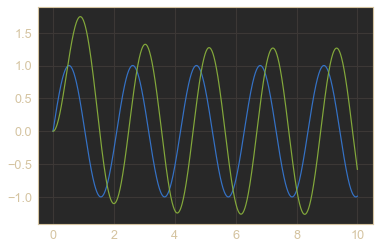

In [34]:
plt.plot(t, u, t, y)

## tbcontrol

### Symbolic conversion to tf from ss
Doesnt work reliably - use control rather

In [47]:
sp.var("s")
A, B, C, D = sp.Matrix(G_ss.A), sp.Matrix(G_ss.B), sp.Matrix(G_ss.C), sp.Matrix(G_ss.D)
G_tbcntrl = tbcontrol.symbolic.ss2tf(A, B, C, D, s)

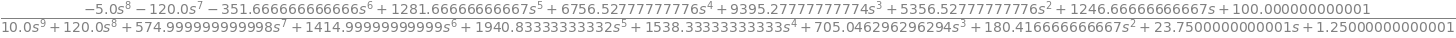

In [48]:
G_tbcntrl = G_tbcntrl[0].simplify()
G_tbcntrl

### FOPDT and SOPDT

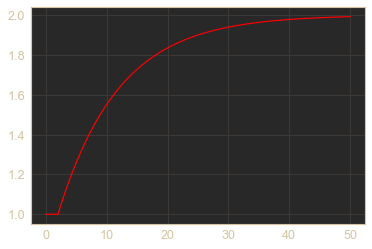

In [49]:
K = 1
τ = 10
θ = 2
y0 = 1 # initial

tspan = np.linspace(0, 50, 2001)
plt.plot(tspan, tbcontrol.responses.fopdt(tspan, K, τ, θ, y0), color='red')

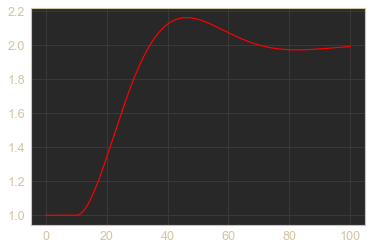

In [50]:
K = 1
τ = 10
θ = 10
ζ = 0.5
y0 = 1 # initial

tspan = np.linspace(0, 100, 2001)
plt.plot(tspan, tbcontrol.responses.sopdt(tspan, K, τ, ζ, θ, y0), color='red')

## Analysis of the 'A' matrix in SS
Eigenvalues give an indication of stability

In [51]:
G_tf = control.tf([-3, -48, 240], [6, 24, 19, 3])
G_tf


   -3 s^2 - 48 s + 240
-------------------------
6 s^3 + 24 s^2 + 19 s + 3

In [52]:
G_ss = control.ss(G_tf)
A, B, C, D = G_ss.A, G_ss.B, G_ss.C, G_ss.D

In [53]:
eigenvalues, eigenvector = np.linalg.eig(A)
eigenvalues

array([-3.        , -0.78867513, -0.21132487])

In [54]:
poles = G_tf.pole()
poles

array([-3.        , -0.78867513, -0.21132487])

# Combination inputs

In [55]:
sp.var("s")
sp.var("t", positive=True, real=True)
u = sp.Heaviside
def r(t):
    return t*u(t)

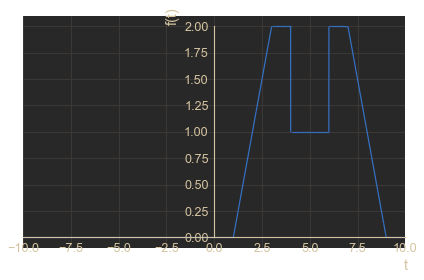

In [56]:
U = r(t - 1) - r(t - 3) - u(t - 4) + u(t - 6) - r(t - 7) + r(t - 9)
sp.plot(U)

# Euler's method

## With dead time
Example 6.3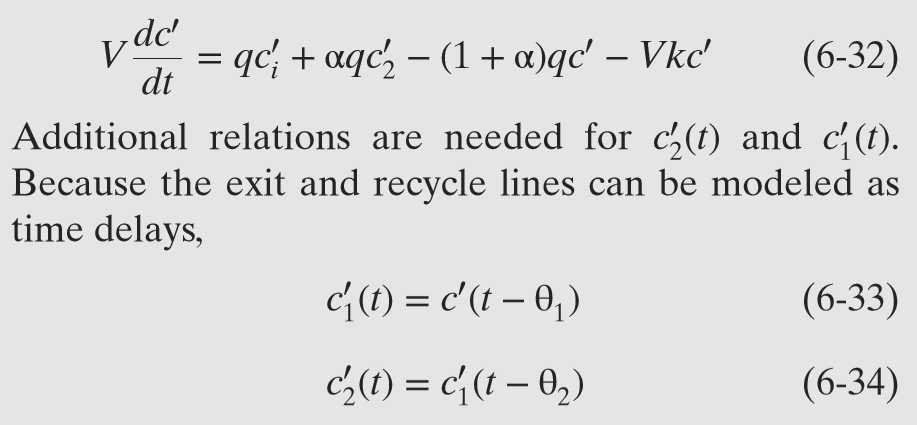

In [57]:
# Params
V = 5
q = 0.05
k = 0.04
α = 12
θ_1 = 0.9
θ_2 = 1.1
Ci = 2000

t_end = 100
dt = 0.1

In [58]:
# Integration
C = [0]
C1 = [0]
C2 = [0]
t = [0]
i = 0
while (t[-1] <= t_end):
    C1_val = np.interp(t[i] - θ_1, t, C)
    C2_val = np.interp(t[i] - θ_2, t, C1)
    
    dC = dt/V*(q*Ci + α*q*C2_val - (1 + α)*q*C[i] - V*k*C[i])
    
    C.append(C[i] + dC)
    C1.append(C1_val)
    C2.append(C2_val)
    t.append(t[i] + dt)
    i += 1

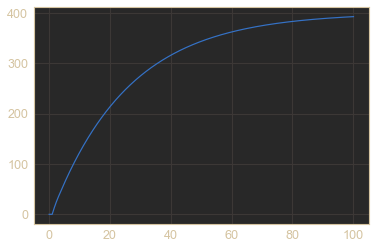

In [59]:
plt.figure()
plt.plot(t, C1)

# Approximation

## Pade approx for dead time

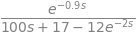

In [60]:
G = sp.exp(-0.9*s)/(100*s + 17 - 12*sp.exp(-2*s))
G

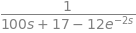

In [61]:
G_no_dt = 1/(100*s + 17 - 12*sp.exp(-2*s))
G_no_dt

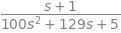

In [62]:
# Pade subs
pade_subs = {sp.exp(-2*s): tbcontrol.symbolic.pade(sp.exp(-2*s), s, 1, 1)} # or pade_subs = {sp.exp(-2*s): (1 - 2/2*s)/(1 + 2/2*s)}
G_no_dt_approx = G_no_dt.subs(pade_subs).simplify()
G_no_dt_approx

In [63]:
numer = sp.poly(sp.numer(G_no_dt_approx), s)
denom = sp.poly(sp.denom(G_no_dt_approx), s)
numer, denom

In [64]:
G_no_dt_approx_lti = signal.lti([1, 1], [100, 129, 5])

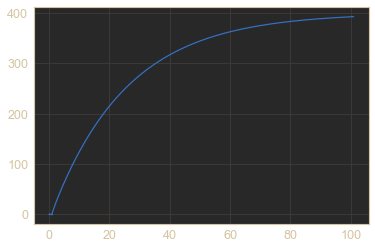

In [65]:
# Step response with input = M/s
M = 2000
θ_dt = 0.9

t_span = np.linspace(0, 100, 1000) 
y = M*G_no_dt_approx_lti.step(T=t_span)[1]

# dead time taken into account here
t_span_dt = np.concatenate([[0], t_span + θ_dt])
y_dt = np.concatenate([[0], y])

plt.figure()
plt.plot([0, 0.9], [0, 0], 'b')
plt.plot(t_span_dt, y_dt, 'b')

## Skogestad's half rule

In [66]:
s = control.tf([1, 0], [1])
G = (-3*s**2 - 48*s + 240)/((s + 3)*(6*s**2 + 6*s + 1))
G


   -3 s^2 - 48 s + 240
-------------------------
6 s^3 + 24 s^2 + 19 s + 3

In [67]:
numer_tau = -1/G.zero()
denom_tau = -1/G.pole()
K = G.dcgain()
numer_tau, denom_tau, K

(array([ 0.05, -0.25]),
 array([0.33333333, 1.26794919, 4.73205081]),
 array(80.))

In [68]:
θ_approx, τ_approx = tbcontrol.numeric.skogestad_half(numer_tau, denom_tau, delay=0, order=2)
G_approx_nodt = K/((τ_approx[0]*s + 1)*(τ_approx[1]*s + 1))
G_approx_nodt


          80
-----------------------
6.789 s^2 + 6.167 s + 1

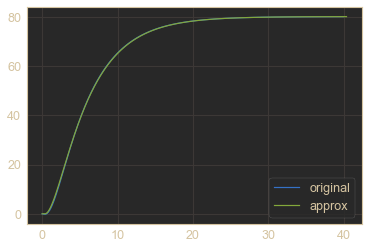

In [69]:
# Plot comparison
t_span = np.linspace(0, 40, 1000)

y = control.step_response(G, t_span)[1]
y_approx_no_dt = control.step_response(G_approx_nodt, t_span)[1]

# Deat time
t_span_dt = np.concatenate([[0], t_span + θ_approx])
y_approx_dt = np.concatenate([[0], y_approx_no_dt])

plt.figure()
plt.plot(t_span, y, label="original")
plt.plot(t_span_dt, y_approx_dt, label="approx")
plt.legend()

# Block flow diagram simplification
ex) 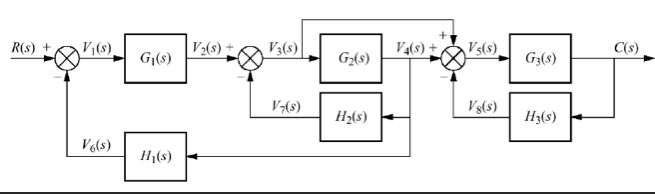

In [70]:
sp.var("R, V_1, V_2, V_3, V_4, V_5, V_6, V_7, V_8, C, G_1, G_2, G_3, H_1, H_2, H_3, G_tot")

In [71]:
var = R, V_1, V_2, V_3, V_4, V_5, V_6, V_7, V_8, C, G_tot

eqs = [R - V_6 - V_1,           # Nodes
       V_2 - V_7 - V_3,
       V_3 + V_4 - V_8 - V_5,
    
       V_1*G_1 - V_2,           # Trans func
       V_3*G_2 - V_4,
       V_5*G_3 - C,
       V_4*H_1 - V_6,
       V_4*H_2 - V_7,
       C*H_3 - V_8,
       
       C/R - G_tot]             # Total G definition

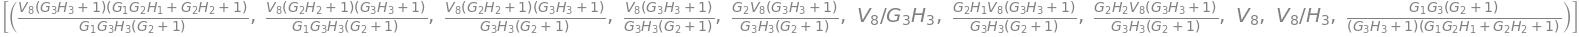

In [72]:
sol = sp.solve(eqs, var)
sol

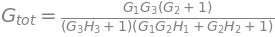

In [73]:
sp.Eq(G_tot, sol[-1][-1].factor())

# Transfer function matrixes

## From SS

In [74]:
sp.var("s")
A = sp.Matrix([[-1, 0, 0],
               [0, 0, 0,],
               [0, 0, -1/2]])
B = sp.Matrix([[2, 0],
               [0, 2],
               [0, 1]])
C = sp.Matrix([[1, 3/2, 0],
               [1/2, 0, 1]])
D = sp.Matrix([[0, 0],
               [0, 0]])

In [75]:
G_matrix = C*(s*sp.eye(3) - A)**-1*B + D
G_matrix

⎡  2      3.0  ⎤
⎢─────    ───  ⎥
⎢s + 1     s   ⎥
⎢              ⎥
⎢ 1.0      1   ⎥
⎢─────  ───────⎥
⎣s + 1  s + 0.5⎦

In [76]:
eigenvalues, eigenvectors = np.linalg.eig(np.matrix(A, dtype=float))
eigenvalues

array([-1. ,  0. , -0.5])

## From linearised Laplace equations
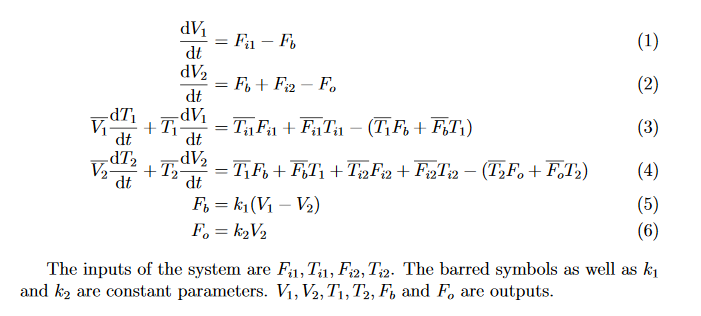

In [77]:
inputs = F_i1, T_i1, F_i2, T_i2 = sp.symbols("F_i1, T_i1, F_i2, T_i2")
outputs = V_1, V_2, T_1, T_2, F_b, F_o = sp.symbols("V_1, V_2, T_1, T_2, F_b, F_o")
bars = Vbar_1, Vbar_2, Tbar_1, Tbar_2, Fbar_b, Fbar_o, Fbar_i1, Tbar_i1, Fbar_i2, Tbar_i2 = sp.symbols("Vbar_1, Vbar_2, Tbar_1, Tbar_2, Fbar_b, Fbar_o, Fbar_i1, Tbar_i1, Fbar_i2, Tbar_i2")
s, k_1, k_2, F_b, F_o = sp.symbols("s, k_1, k_2, F_b, F_o")

In [78]:
eqs = [s*V_1 - (F_i1 - F_b),
       s*V_2 - (F_b + F_i2 - F_o),
       s*Vbar_1*T_1 + s*Tbar_1*V_1 - (Tbar_i1*F_i1 + Fbar_i1*T_i1 - (Tbar_1*F_b + Fbar_b*T_1)),
       s*Vbar_2*T_2 + s*Tbar_2*V_2 - (Tbar_1*F_b + Fbar_b*T_1 + Tbar_i2*F_i2 + Fbar_i2*T_i2 - (Tbar_2*F_o + Fbar_o*T_2)),
       F_b - (k_1*(V_1 - V_2)),
       F_o - (k_2*V_2)]

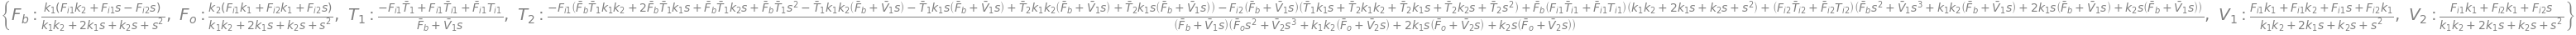

In [79]:
sols = sp.solve(eqs, outputs)
sols

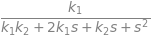

In [80]:
matrix = [[sols[out].expand().coeff(inp) for inp in inputs] for out in outputs]
matrix[1][0]

# Process identification

## Pseudo random binary input

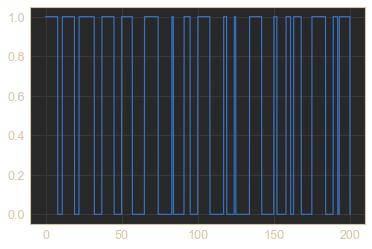

In [81]:
stepsize = 0.1
t_max = 200
t_span = np.arange(0, t_max + stepsize, stepsize)
u = []
on = True
while (len(u) <= len(t_span)):
    steplength = np.random.randint(1, 11)
    
    if (on == True):
        for j in range(int(steplength/stepsize)):
            u.append(1)
        on = False
    else:
        for j in range(int(steplength/stepsize)):
            u.append(0)
        on = True
u = u[:len(t_span)]

plt.plot(t_span, u)

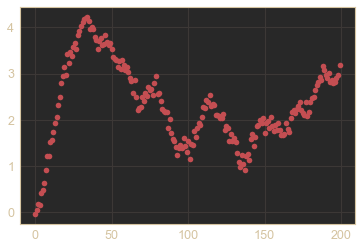

In [82]:
# dummy data
K = 5
τ = 10
ζ = 0.6

G = signal.lti([K], [τ**2, 2*ζ*τ, 1])
y = signal.lsim(G, U=u, T=t_span)[1]
y_noise = np.array(y) + np.random.normal(0, 0.1, len(y))

interval = int(1/stepsize)
num_samples = len(t_span)//interval
y_sample = [y_noise[interval*p] for p in range(num_samples)]
t_span_sample = [t_span[interval*p] for p in range(num_samples)]
u_sample = [u[interval*p] for p in range(num_samples)]
plt.plot(t_span_sample, y_sample, 'ro')

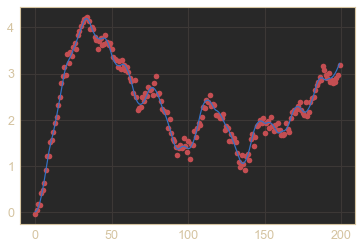

In [83]:
# fit using lsim
def fit_fn(t, K, τ, ζ):
    G = signal.lti([K], [τ**2, 2*ζ*τ, 1])
    return signal.lsim(G, U=u_sample, T=t)[1]
K, τ, ζ = optimize.curve_fit(fit_fn, t_span_sample, y_sample, [3, 20, 0.5])[0]

plt.plot(t_span_sample, y_sample, 'ro')
plt.plot(t_span_sample, fit_fn(t_span_sample, K, τ, ζ))

## Step input

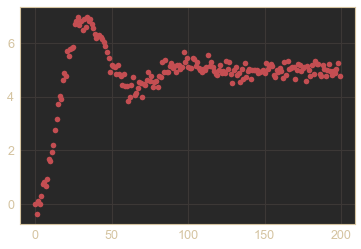

In [84]:
# dummy data
K = 5
τ = 10
ζ = 0.3

G = control.tf([K], [τ**2, 2*ζ*τ, 1])
y = control.step_response(G, t_span)[1]
y_noise = np.array(y) + np.random.normal(0, 0.2, len(y))

interval = int(1/stepsize)
num_samples = len(t_span)//interval
y_sample = [y_noise[interval*p] for p in range(num_samples)]
t_span_sample = [t_span[interval*p] for p in range(num_samples)]

plt.plot(t_span_sample, y_sample, 'ro')

5.096665891881209 9.915080099762822 0.3055583947198898 0.17682629949030435 -0.114831512623621


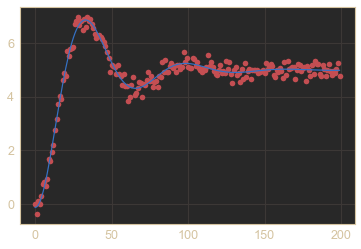

In [85]:
# fit using tbcontrol
K, τ, ζ, θ, y0 = optimize.curve_fit(tbcontrol.responses.sopdt, t_span_sample, y_sample, [3, 20, 0.5, 0, 0])[0]

plt.plot(t_span_sample, y_sample, 'ro')
plt.plot(t_span_sample, tbcontrol.responses.sopdt(t_span_sample, K, τ, ζ, θ, y0))
print(K, τ, ζ, θ, y0)

# Frequency response

 ## Fourier series
 $$s_N(t) = \sum_{n=0}^N \left(a_n \cos\left(\frac{2\pi nt}{P}\right) + b_n \sin\left(\frac{2\pi nt}{P}\right)\right)$$


In [86]:
# input
t0 = -10
P = 20
N = 10
M = 1
sp.var('t', real=True)
sp.var('s')

In [87]:
# step function
def f(t):
    if (t < 0):
        return 0
    else:
        return M

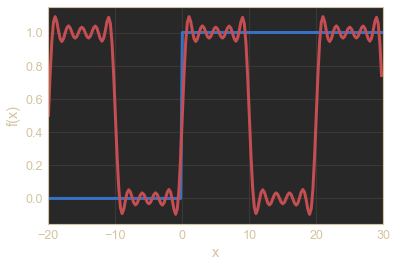

In [88]:
an, bn = mpmath.fourier(f, [t0, t0 + P], N)

def fourier(t):
    return mpmath.fourierval([an, bn], [t0, t0 + P], t)
mpmath.plot([f, fourier], [2*t0, t0 + 2*P])

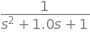

In [89]:
# second order sys
τ = 1
ζ = 0.5

G = 1/(τ**2*s**2 + 2*τ*ζ*s + 1)
G_num = sp.lambdify(s, G, 'numpy')
G

In [90]:
n = np.arange(0, N + 1)
t_span = np.linspace(t0, t0 + P, 2001)
ω_list = 2*np.pi*n/P
G_jω_list = G_num(1j*ω_list)

AR_list = np.abs(G_jω_list)
ϕ_list = np.angle(G_jω_list)

In [91]:
# response
def sines(t):
    return [AR_list[i]*list(bn)[i]*np.sin(ω_list[i]*t + ϕ_list[i]) for i in range(len(ω_list))]
def cosines(t):
    return [AR_list[i]*list(an)[i]*np.cos(ω_list[i]*t + ϕ_list[i]) for i in range(len(ω_list))]

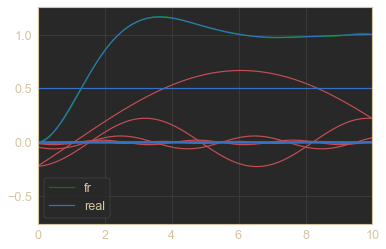

In [92]:
# plot
plt.figure()
[plt.plot(t_span, sines(t_span)[i], 'r') for i in range(len(ω_list))]
[plt.plot(t_span, cosines(t_span)[i], 'b') for i in range(len(ω_list))]
plt.plot(t_span, sum(sines(t_span)) + sum(cosines(t_span)), 'green', label="fr")
plt.plot(t_span, tbcontrol.responses.sopdt(t_span, 1, τ, ζ), label="real")
plt.xlim(0, t0 + P)
plt.legend()

## Bode bois
np.unwrap used to prevent discontinuities from when $\phi$ reaches -90

In [93]:
K = 1
τ = 2
ζ = 1
θ = 2

In [94]:
ω_list = np.logspace(-2, 2, 2001)
s_list = 1j*ω_list

G1_jω_list = K/(τ*s_list + 1)
G2_jω_list = K/(τ**2*s_list**2 + 2*ζ*τ*s_list + 1)
Gdt_jω_list = np.exp(-2*s_list)

AR1_list = np.abs(G1_jω_list)
ϕ1_list = np.degrees(np.unwrap(np.angle(G1_jω_list)))
AR2_list = np.abs(G2_jω_list)
ϕ2_list = np.degrees(np.unwrap(np.angle(G2_jω_list)))
ARdt_list = np.abs(Gdt_jω_list)
ϕdt_list = np.degrees(np.unwrap(np.angle(Gdt_jω_list)))

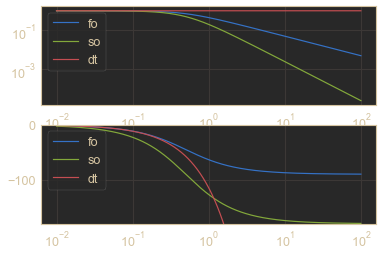

In [95]:
fig, [ax_AR, ax_ϕ] = plt.subplots(2, 1)
ax_AR.loglog(ω_list, AR1_list)
ax_AR.loglog(ω_list, AR2_list)
ax_AR.loglog(ω_list, ARdt_list)
ax_AR.legend(["fo", "so", "dt"])

ax_ϕ.semilogx(ω_list, ϕ1_list)
ax_ϕ.semilogx(ω_list, ϕ2_list)
ax_ϕ.semilogx(ω_list, ϕdt_list)
ax_ϕ.set_ylim(-180, 0)
ax_ϕ.legend(["fo", "so", "dt"])

(array([9.99600160e-01, 9.99596462e-01, 9.99592729e-01, ...,
        2.54641363e-05, 2.52306855e-05, 2.49993750e-05]),
 array([-0.03999467, -0.04017923, -0.04036463, ..., -3.13150021,
        -3.13154658, -3.13159274]),
 array([1.00000000e-02, 1.00461579e-02, 1.00925289e-02, ...,
        9.90831945e+01, 9.95405417e+01, 1.00000000e+02]))

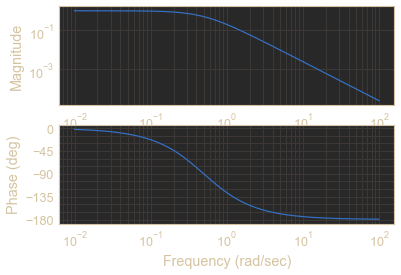

In [96]:
G = control.tf([1], [τ**2, 2*τ*ζ, 1])
control.bode(G, ω_list)

## Nyquist lads

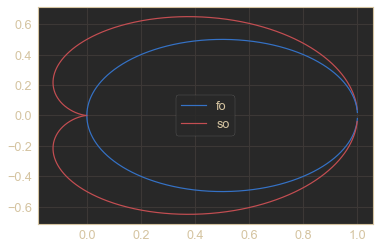

In [97]:
plt.plot(G1_jω_list.real, G1_jω_list.imag, color='b')
plt.plot(G2_jω_list.real, G2_jω_list.imag, color='r')
plt.plot(G2_jω_list.real, -G2_jω_list.imag, color='r')
plt.plot(G1_jω_list.real, -G1_jω_list.imag, color='b')
plt.legend(["fo", "so"])

(array([ 9.98800800e-01,  9.98789711e-01,  9.98778520e-01, ...,
        -2.54628394e-05, -2.52294124e-05, -2.49981251e-05]),
 array([-3.99680192e-02, -4.01522061e-02, -4.03372390e-02, ...,
        -2.56990986e-07, -2.53465056e-07, -2.49987500e-07]),
 array([1.00000000e-02, 1.00461579e-02, 1.00925289e-02, ...,
        9.90831945e+01, 9.95405417e+01, 1.00000000e+02]))

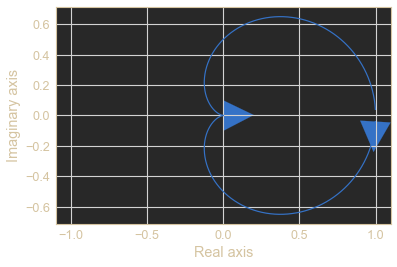

In [98]:
control.nyquist_plot(G, ω_list)

# Z - transform

## From first principles
$$\mathcal{Z}[f^*(t)] = \sum_{k=0}^{\infty} f(k \Delta t) z^{-k}$$


In [99]:
sp.var("s, z")
sp.var("k", positive=True, real=True)

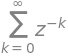

In [100]:
unitstep = sp.Sum(1*z**-k, (k, 0, sp.oo))
unitstep

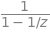

In [101]:
unitstep = unitstep.doit().args[0][0]
unitstep

## First order response

### Exact response (to step input) - tbcontrol
$$G(z) = \frac{Y(z)}{U(z)} = \frac{b_1 z^{-1}}{1 + a_1 z^{-1}}$$
$$a_1 = -e^{-\Delta t/\tau}$$
$$b_1 = K(1 - e^{-\Delta t/\tau})$$

In [102]:
sp.var("a1, b1")

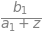

In [103]:
Gz = b1*z**-1/(1 + a1*z**-1)
Gz.factor()

In [104]:
K = 2
τ = 1
dt = 1

subs = {a1: -np.exp(-dt/τ), b1: K*(1 - np.exp(-dt/τ))}

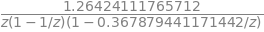

In [105]:
Gz = Gz.subs(subs)
Yz = Gz*unitstep
Yz

In [106]:
t_discrete = dt*np.arange(N)
y_discrete = tbcontrol.symbolic.sampledvalues(Yz, z, N)
y_discrete

In [107]:
t_cont = np.linspace(0, N*dt, 1001)
y_cont = tbcontrol.responses.fopdt(t_cont, K, τ)

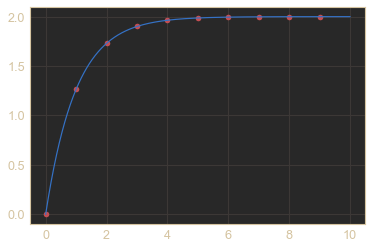

In [108]:
plt.plot(t_discrete, y_discrete, 'ro')
plt.plot(t_cont, y_cont)

### Exact response (to step input) - scipy.signal
NB: uses TF in terms of $z$ not $z^{-1}$

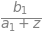

In [109]:
Gz = b1*z**-1/(1 + a1*z**-1)
Gz.factor()

In [110]:
a1 = -np.exp(-dt/τ)
b1 = K*(1 - np.exp(-dt/τ))

In [111]:
Gz_signal = signal.dlti(b1, [1, a1], dt=1)
Gz_signal

TransferFunctionDiscrete(
array([1.26424112]),
array([ 1.        , -0.36787944]),
dt: 1
)

In [112]:
y_signal = Gz_signal.step(n=N)[1][0]
y_signal

array([[0.        ],
       [1.26424112],
       [1.72932943],
       [1.90042586],
       [1.96336872],
       [1.98652411],
       [1.9950425 ],
       [1.99817624],
       [1.99932907],
       [1.99975318]])

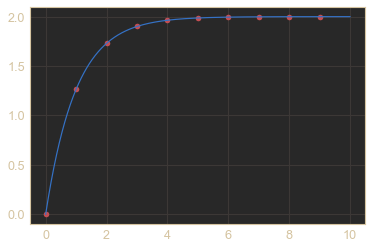

In [113]:
plt.plot(t_discrete, y_signal, 'ro')
plt.plot(t_cont, y_cont)

### Exact response (to step input) - control

In [114]:
G_control = control.tf(b1, [1, a1], dt)
G_control


  1.264
----------
z - 0.3679

dt = 1

In [115]:
y_control = control.step_response(G_control,T=t_discrete)[1]
y_control

array([0.        , 1.26424112, 1.72932943, 1.90042586, 1.96336872,
       1.98652411, 1.9950425 , 1.99817624, 1.99932907, 1.99975318])

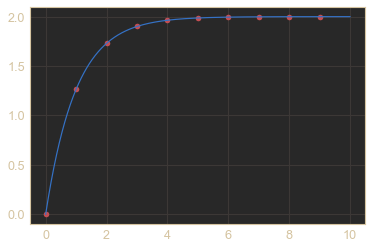

In [116]:
plt.plot(t_discrete, y_control, 'ro')
plt.plot(t_cont, y_cont)